<a href="https://colab.research.google.com/github/Chandra142/SkillCraft_Internship/blob/main/SCT_ML_03_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:

import zipfile
import os
from google.colab import files


# Unzip the file
with zipfile.ZipFile("/content/PetImages.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

print("✅ Unzipped successfully!")

✅ Unzipped successfully!


In [23]:
def predict_uploaded_image(image_path, model, threshold=0.7):
    import matplotlib.pyplot as plt
    from sklearn.metrics import accuracy_score, confusion_matrix
    import seaborn as sns

    # Load & preprocess uploaded image
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE if USE_GRAYSCALE else cv2.IMREAD_COLOR)
    if img is None:
        print("❌ Failed to load image.")
        return

    img_resized = cv2.resize(img, IMG_SIZE)
    img_flat = img_resized.flatten().reshape(1, -1) / 255.0  # Normalize

    # PCA (if used)
    if 'pca' in globals():
        img_flat = pca.transform(img_flat)

    # Get prediction
    probs = model.predict_proba(img_flat)[0]
    confidence = max(probs)
    pred = np.argmax(probs)
    raw_label = "Dog" if pred == 1 else "Cat"

    # Strict rejection rule
    if confidence < threshold:
        display_label = "Neither Cat nor Dog"
    else:
        display_label = raw_label

    # Show image with prediction
    img_show = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB) if not USE_GRAYSCALE else img_resized
    plt.imshow(img_show, cmap='gray' if USE_GRAYSCALE else None)
    plt.title(f"Predicted: {display_label} (Confidence: {confidence:.2f})")
    plt.axis('off')
    plt.show()

    # Show result
    print(f"✅ Final Decision: {display_label}")
    print(f"ℹ️ Raw Model Prediction: {raw_label} with confidence {confidence:.2f}")

    # Accuracy & confusion matrix on test set
    y_pred_test = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred_test)
    print(f"\n📊 Test Set Accuracy: {acc:.2f}")

    cm = confusion_matrix(y_test, y_pred_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix (Test Set)")
    plt.show()


Saving download (1).jpg to download (1) (1).jpg


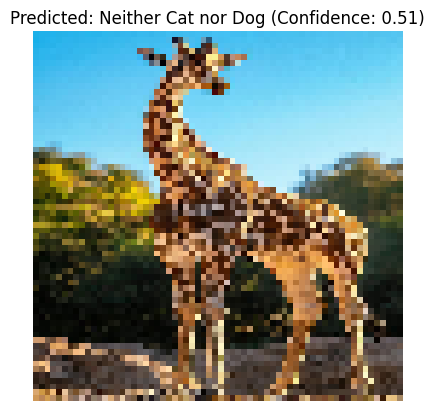

✅ Final Decision: Neither Cat nor Dog
ℹ️ Raw Model Prediction: Cat with confidence 0.51

📊 Test Set Accuracy: 0.59


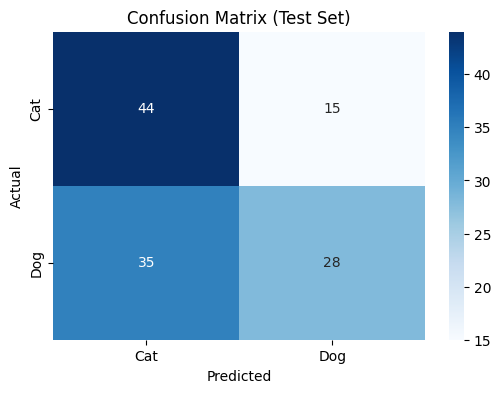

In [24]:
# Upload and test
uploaded = files.upload()
predict_uploaded_image(list(uploaded.keys())[0], svm_model)